In [1]:
import torch
from vision.datasets.open_images import OpenImagesDataset
from vision.utils import box_utils, measurements
from vision.utils.misc import str2bool, Timer
import pathlib
import numpy as np
import logging
import sys
from PIL import Image, ImageFilter
from vision.ssd.mobilenet_v2_ssd_lite import create_mobilenetv2_ssd_lite_predictor
from vision.ssd.mobilenetv3_ssd_lite import create_mobilenetv3_small_ssd_lite
import time
import cv2

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
image_path = "./test_ball.jpg"
trained_model = "./models/mbv3-v2-Epoch-65-Loss-4.263951171823099.pth" #モデルパス
nms_method = "hard"
iou_threshold = 0.5 #"The threshold of Intersection over Union."
use_2007_metric = True
eval_dir = "eval_results" #The directory to store evaluation results
label_file = "./models/open-images-model-labels.txt" #The label file path
class_names = [name.strip() for name in open(label_file).readlines()]

In [3]:
net = create_mobilenetv3_small_ssd_lite(len(class_names), is_test=True)
t1 = time.time()
net.load(trained_model)
net = net.to(DEVICE)
predictor = create_mobilenetv2_ssd_lite_predictor(net, nms_method=nms_method, device=DEVICE)

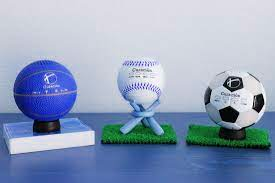

In [4]:
image = cv2.imread(image_path)
display(Image.fromarray(image))

In [5]:
boxes, labels, probs = predictor.predict(image, 10, 0.4)

Inference time:  0.28229331970214844


In [6]:
for i in range(len(boxes)):
    box = boxes[i, :]
    box = list(map(int, box))
    flag = 1
    label = class_names[labels[i]] + str(probs[i])
    cv2.rectangle(image, (box[0], box[1]), (box[2], box[3]), (255, 255, 0), 4)
    cv2.putText(image, label,
                (int(box[0]) + 20, int(box[1]) + 40),
                cv2.FONT_HERSHEY_SIMPLEX,
                1,  # font scale
                (255, 0, 255),
                2)  # line type

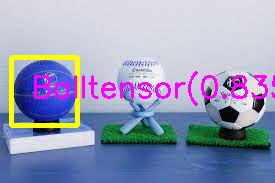

In [7]:
display(Image.fromarray(image))